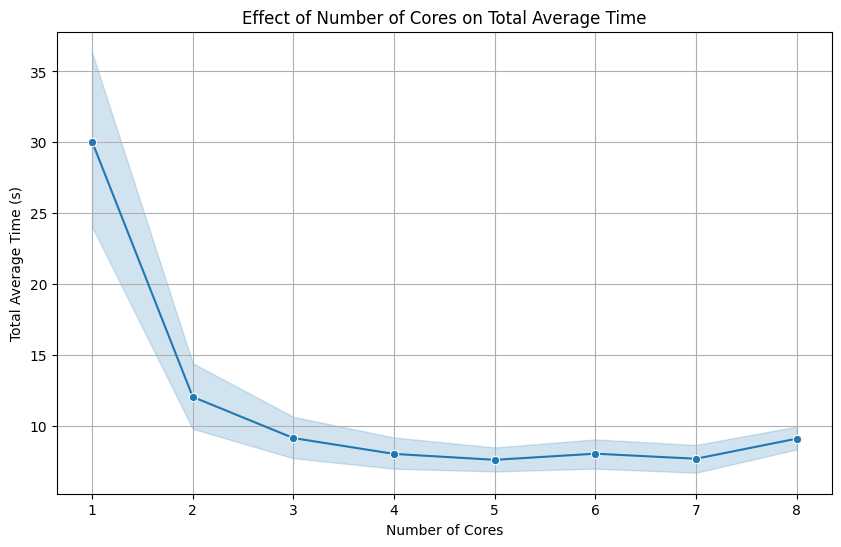

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import json


def load_benchmark_data(file_pattern: str) -> pd.DataFrame:
    """Load and combine benchmark data from JSON files into a single DataFrame."""
    files = glob.glob(file_pattern)
    data_list = []

    for file in files:
        with open(file, "r") as f:
            data = json.load(f)
            cores = int(file.split("_")[-2])
            for result in data:
                result["cores"] = cores
                data_list.append(result)

    return pd.DataFrame(data_list)


def convert_columns_to_numeric(df: pd.DataFrame, columns: list) -> None:
    """Convert specified columns in the DataFrame to numeric types."""
    df[columns] = df[columns].apply(pd.to_numeric, errors="coerce")


def plot_line(
    df: pd.DataFrame, x: str, y: str, title: str, xlabel: str, ylabel: str
) -> None:
    """Generate a line plot for the specified columns."""
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x=x, y=y, marker="o")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()


def process_and_visualize(df: pd.DataFrame) -> None:
    """Process the DataFrame and create visualizations."""
    numeric_columns = [
        "avg_route_length",
        "avg_local_opt_time",
        "avg_mpi_strategy_time",
        "mutation_rate",
        "tournament_size",
        "max_generations",
        "population_size",
        "num_cities",
        "migration_size",
        "generations_per_migration",
        "cores",
    ]
    convert_columns_to_numeric(df, numeric_columns)

    df["total_avg_time"] = df["avg_local_opt_time"] + df["avg_mpi_strategy_time"]

    plot_line(
        df=df,
        x="cores",
        y="total_avg_time",
        title="Effect of Number of Cores on Total Average Time",
        xlabel="Number of Cores",
        ylabel="Total Average Time (s)",
    )


file_pattern = "results_time/benchmark_results_*_cores.json"
df = load_benchmark_data(file_pattern)
process_and_visualize(df)

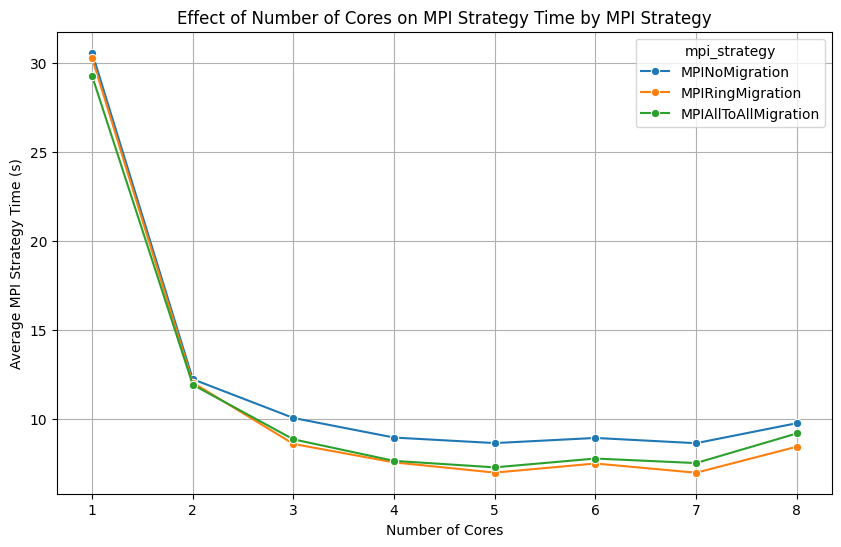

In [39]:
def plot_line_with_hue(
    df: pd.DataFrame, x: str, y: str, hue: str, title: str, xlabel: str, ylabel: str
) -> None:
    """Generate a line plot with multiple lines for different hue categories."""
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x=x, y=y, hue=hue, marker="o", err_style=None)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()


plot_line_with_hue(
    df=df,
    x="cores",
    y="avg_mpi_strategy_time",
    hue="mpi_strategy",
    title="Effect of Number of Cores on MPI Strategy Time by MPI Strategy",
    xlabel="Number of Cores",
    ylabel="Average MPI Strategy Time (s)",
)